In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors
import keyboard

In [3]:
def plot_coms(G, coms):
    colour_map = []

    colour_dict = {}
    for com in coms:
        colour_dict[com] = random_color_generator()

    for node in G:
        for com in coms:
            if node in coms[com]:
                colour_map.append(colour_dict[com])
    nx.draw(G, node_color=colour_map)


def generate_com_from_df(df):
    coms = {}
    for row, node in df.iterrows():
        if node[1] not in coms:
            coms[node[1]] = []
        coms[node[1]].append(node[0])
    return coms

def generate_com_from_dict(dict):
    coms = {}
    for node, com in dict.items():
        if com not in coms:
            coms[com] =[]
        coms[com].append(node)
    return coms

def generate_node_dict(coms=dict):
    node_dict = {}
    for key, value in coms.items():
        for node in value:
            node_dict[node] = key

    return node_dict


def random_color_generator():
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))
    return color

def find_com(node, coms):
    for com in coms:
            #find which community the node is in
            if node in coms[com]:
                 return com
        
def create_partition(coms):
    return list(coms.values())


Text(0.5, 1.0, 'Size Distribution of Partitions inside Target Community')

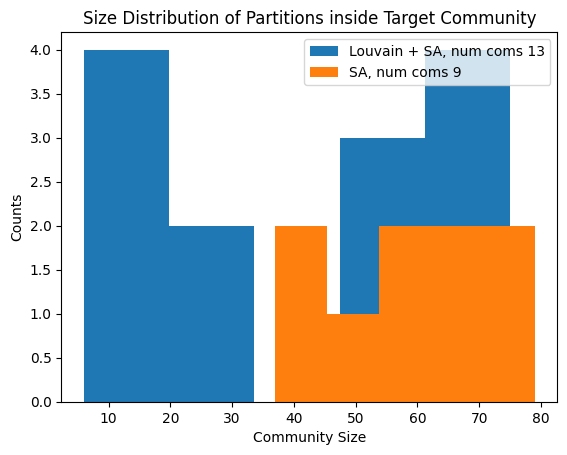

In [11]:
partition = pd.read_csv('LOUVAIN_SA_in_com_11_final.csv', names = [0, 1])

coms = generate_com_from_df(partition)
lens = []
for com in coms:
    lens.append(len(coms[com]))
plt.hist(lens, bins = 5, label=f'Louvain + SA, num coms {len(lens)}')

# partition = pd.read_csv('inner_louvain_partition.csv', names = [0, 1])

# coms = generate_com_from_df(partition)
# lens = []
# for com in coms:
#     lens.append(len(coms[com]))
# plt.hist(lens, bins = 5, label=f'Louvain + SA, num coms {len(lens)}')

partition = pd.read_csv('SA_in_com_11_final.csv', names = [0, 1])
coms = generate_com_from_df(partition)
lens = []
for com in coms:
    lens.append(len(coms[com]))
plt.hist(lens, bins=5, label=f'SA, num coms {len(lens)}')
plt.xlabel('Community Size')
plt.ylabel('Counts')
plt.legend()
plt.title('Size Distribution of Partitions inside Target Community')